### Exercise for MCMC Metropolis-Hastings

- Following example of this [blog post](https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a)

- Algorithm summary:
    - find $f$, the pdf of the distribution to sample from
    - find $Q$, the transition distribution to generate new sample
    - $\theta_0$, the initial guess for $\theta$
    - set $\theta = \theta_0$
    - for $n$ iterations:
        - $p = f(D|\Theta=\theta)P(\theta)$
        - $\theta' = Q(\theta_i)$
        - $p' = f(D|\Theta=\theta')P(\theta')$
        - $ratio = \frac{p'} { p}$
        - generate a uniform random number $r \in [0, 1]$
        - if $r$ < ratio: set $\theta_i = \theta'$
        


In [1]:
# the exercise assumes the data is from a normal distribution with known mu. only need to sample standard deviation

class mcmc_mh():
    
    def __init__(self, data):
        assert data.ndim == 1, 'input data has more than 1 dimension'
        self.data = data
        self.mu = np.mean(data)
        self.sigma = np.random.uniform(0, 10)
    
    # define the prior distribution for standard deviation sigma
    def prior(self, sigma):
        return (1 / np.sqrt(2*np.pi*sigma**2)) * np.exp(-(sigma-1)**2)
    
    # draw sample for new sigma from the transition distribution, which is another normal, with mu = old sigma
    def sample(self):
        return np.random.normal(self.sigma, 0.5)
    
    # function for calculating log-likelihood of data, with given parameters
    def log_like_normal(self, sigma):
        return np.sum(-np.log(sigma * np.sqrt(2*np.pi)) - ((self.data - self.mu)**2) / (2*sigma**2))
    
    # decision rule for sample acceptance
    def acceptance (self, p, p_new):
        if p_new > p:
            return True
        else:
            accept = np.random.uniform(0, 1)
            return (accept < np.exp(p_new - p))
    
    # main function combining all components    
    def metropolis_hastings(self, n_iters=5000):
        accepted = []
        rejected = []
        for i in range(n_iters):
            sig_new = self.sample()
            sig_like = self.log_like_normal(self.sigma)
            sig_new_like = self.log_like_normal(sig_new)
            if self.acceptance(sig_like + np.log(self.prior(self.sigma)), sig_new_like + np.log(self.prior(sig_new))):
                self.sigma = sig_new
                accepted.append(sig_new)
            else:
                rejected.append(sig_new)
        
        return np.array(accepted), np.array(rejected)
    
            

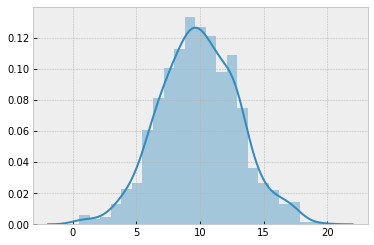

In [2]:
## generate test data using np.random.normal
np.random.seed(614)
population = np.random.normal(10, 3, 3000)
train = population[np.random.randint(0, 3000, 1000)]
sns.distplot(train)

In [3]:
# draw samples using mcmc metropolis-hastings
mcmc = mcmc_mh(train)
accepted, rejected = mcmc.metropolis_hastings()

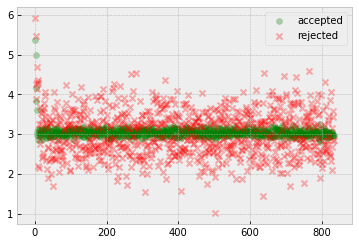

In [6]:
plt.scatter(range(1, len(accepted)+1), accepted, c='green', alpha=0.3)
plt.scatter(range(1, len(accepted)+1), rejected[:len(accepted)], c='red', marker='x', alpha=0.3)
plt.legend(['accepted', 'rejected'], loc='best')